# Titanic Wrangling

In this practice activity you'll continue to work with the titanic dataset in ways that flex what you've learned about both data wrangling and data visualization.

In [1]:
# Import the titanic dataset here
import numpy as np
import pandas as pd
data_dir = "https://dlsun.github.io/pods/data/"
df_titanic = pd.read_csv(data_dir + "titanic.csv")
df_titanic.head()

,name,gender,age,class,embarked,country,ticketno,fare,survived
0,"Abbing, Mr. Anthony",male,42.0,3rd,S,United States,5547.0,7.11,0
1,"Abbott, Mr. Eugene Joseph",male,13.0,3rd,S,United States,2673.0,20.05,0
2,"Abbott, Mr. Rossmore Edward",male,16.0,3rd,S,United States,2673.0,20.05,0
3,"Abbott, Mrs. Rhoda Mary 'Rosa'",female,39.0,3rd,S,England,2673.0,20.05,1
4,"Abelseth, Miss. Karen Marie",female,16.0,3rd,S,Norway,348125.0,7.13,1


## 1. Filter the data to include passengers only. Calculate the joint distribution (cross-tab) between a passenger's class and where they embarked.

In [2]:
classes = df_titanic['class'].unique()
classes

array(['3rd', '2nd', '1st', 'engineering crew', 'victualling crew',
       'restaurant staff', 'deck crew'], dtype=object)

In [3]:
# Code here
passengers = ["1st", "2nd", "3rd"]
df_passengers = df_titanic[df_titanic['class'].isin(passengers)]
#df_passengers["class"].unique()
joint = pd.crosstab(df_passengers["class"], df_passengers["embarked"])
joint


embarked,B,C,Q,S
class,,,,
1st,3,143,3,175
2nd,6,26,7,245
3rd,0,102,113,494


## 2. Using the joint distribution that calculated above, calculate the following:

* the conditional distribution of their class given where they embarked
* the conditional distribution of where they embarked given their class

Use the conditional distributions that you calculate to answer the following quesitons:

* What proportion of 3rd class passengers embarked at Southampton?
* What proportion of Southampton passengers were in 3rd class?

In [4]:
# Code here

# the conditional distribution of their class given where they embarked
cond_embark = pd.crosstab(df_passengers['class'], df_passengers['embarked'], normalize='columns')
print("the conditional distribution of their class given where they embarked")
print(cond_embark)

# the conditional distribution of where they embarked given their class
cond_class = pd.crosstab(df_passengers['class'], df_passengers['embarked'], normalize='index')
print("the conditional distribution of where they embarked given their class")
print(cond_class)

# what proportion of 3rd class passengers embarked at Southampton?
prop_3rd = cond_class.loc["3rd", "S"]
print("what proportion of 3rd class passengers embarked at Southampton?")
print(prop_3rd)

# what proportion of Southampton passengers were in 3rd class?
prop_s = cond_embark.loc["3rd", "S"]
print("what proportion of Southampton passengers were in 3rd class?")
print(prop_s)


the conditional distribution of their class given where they embarked
embarked         B         C         Q         S
class                                           
1st       0.333333  0.527675  0.024390  0.191466
2nd       0.666667  0.095941  0.056911  0.268053
3rd       0.000000  0.376384  0.918699  0.540481
the conditional distribution of where they embarked given their class
embarked         B         C         Q         S
class                                           
1st       0.009259  0.441358  0.009259  0.540123
2nd       0.021127  0.091549  0.024648  0.862676
3rd       0.000000  0.143865  0.159379  0.696756
what proportion of 3rd class passengers embarked at Southampton?
0.6967559943582511
what proportion of Southampton passengers were in 3rd class?
0.5404814004376368


## 3. Make a visualization showing the distribution of a passenger's class, given where they embarked.

Discuss the pros and cons of using this visualization versus the distributions you calculated before, to answer the previous questions.

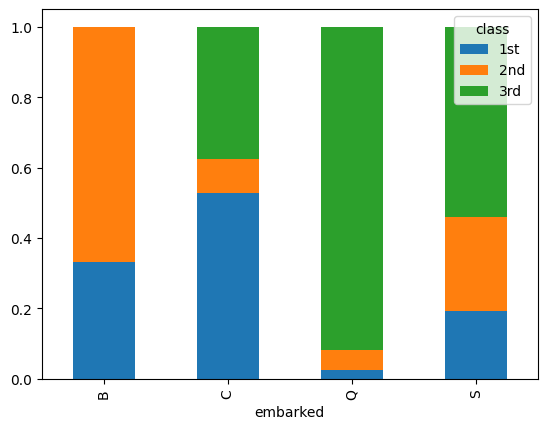

In [5]:
# Code here
import matplotlib.pyplot as plt
cond_embark_plot = cond_embark.T.plot(kind='bar', stacked=True)
plt.xlabel = ("Class")
plt.ylabel = ("Proportion of class")
plt.show()

The pros of this visualization versus the distributions calculated previously is that the colors make the differences in proportions more easy to distinguish. The cons is that you don't get an exact number of the proportion.